In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.shape

(768, 9)

In [10]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:

df.duplicated().sum()

0

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: []
Numerical Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [13]:
df[num_cols].nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [14]:
df.isnull().sum() / df.shape[0] * 100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [15]:
df_processed = df.drop(columns=['Age', 'Outcome', 'BMI','DiabetesPedigreeFunction'])
df_processed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin
0,6,148,72,35,0
1,1,85,66,29,0
2,8,183,64,0,0
3,1,89,66,23,94
4,0,137,40,35,168


In [16]:
df_processed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    768 non-null    int64
 1   Glucose        768 non-null    int64
 2   BloodPressure  768 non-null    int64
 3   SkinThickness  768 non-null    int64
 4   Insulin        768 non-null    int64
dtypes: int64(5)
memory usage: 30.1 KB


In [17]:
col=df_processed.columns 
for i in col:
    print(f"{i}: {df_processed[i].nunique()}")

Pregnancies: 17
Glucose: 136
BloodPressure: 47
SkinThickness: 51
Insulin: 186


In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


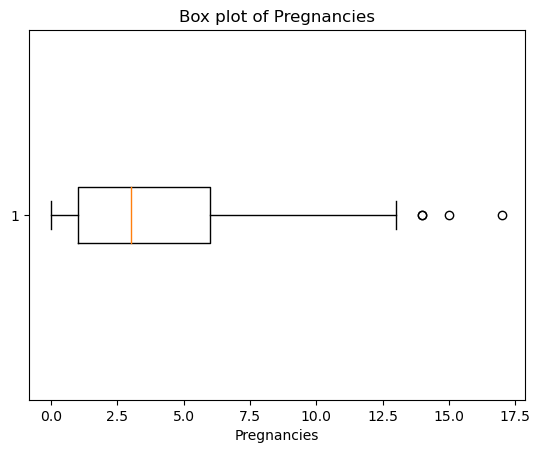

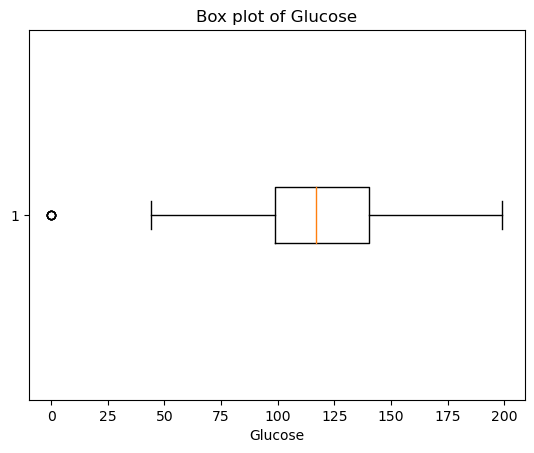

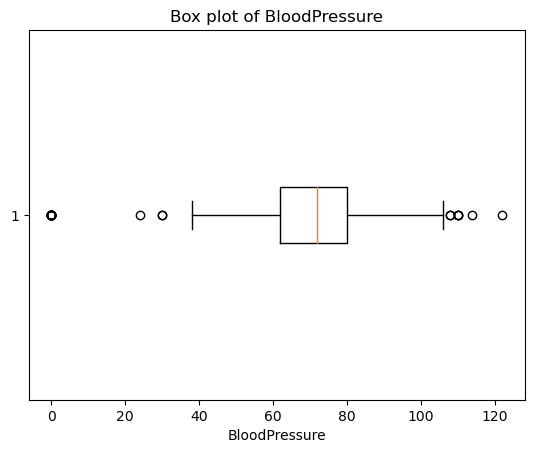

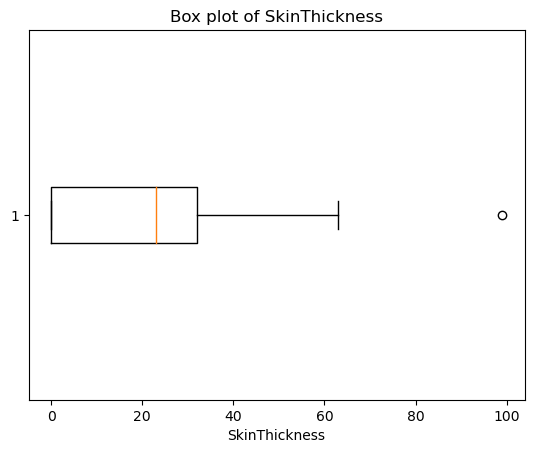

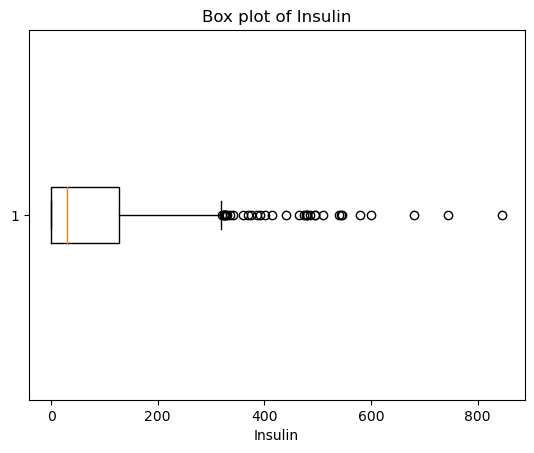

In [19]:
import matplotlib.pyplot as plt
for i,col in enumerate(df_processed.columns):
    plt.boxplot(df_processed[col], vert=False)
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()


In [23]:
mean_glucose = df_processed['Glucose'].mean()
std_glucose = df_processed['Glucose'].std()

lower_bound = mean_glucose - 2 * std_glucose
upper_bound = mean_glucose + 2 * std_glucose

outliers = df_processed[(df_processed['Glucose'] < lower_bound) | (df_processed['Glucose'] > upper_bound)]
outliers_count = outliers.shape[0]
total_count = df_processed.shape[0]
outlier_percentage = (outliers_count / total_count) * 100
outliers.shape

(36, 5)

In [21]:
corr = cleaned_df.corr()
import seaborn as sns

plt.figure(figsize=(10, 8), dpi=96)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

NameError: name 'cleaned_df' is not defined